# Milestone 2 - RNN Seperated training notebook

In [1]:
%cd ..
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scripts_m2 import *
import torch 
from torch import nn 
from torch import optim

/home/karimgamaleldin/NLP_PROJECT_111/QA Task milestone


/home/karimgamaleldin/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Getting the dataloaders and tokenizers
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer()

Loading tokenizer from ./tokenizers/tokenizer.json...
Filtered dataset size: 19922 out of original 20000
Filtered dataset size: 1989 out of original 2000


In [3]:
# View the devices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### Model Training

In [4]:
vocab_size = 10000
context_max_length = 318

model = RNN_QA_Model2(
    vocab_size=vocab_size,
    embedding_dim=256,
    output_dim=context_max_length,
    hidden_dim=256,
    num_layers=3,
    dropout=0.8,
    pad_idx=1
)

#  loss function
criterion = nn.CrossEntropyLoss(ignore_index=1)
#  optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
# Training the model
train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model, 
    train_dataloader=train_dataloader, 
    criterion=criterion, 
    optimizer=optimizer, 
    num_epochs=20,
    device='cuda', 
    inputs=["context", "question"],
    val_dataloader=dev_dataloader, 
    evaluate_val_dataset=True
)

/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/20: 100%|██████████| 623/623 [01:11<00:00,  8.66it/s, loss=10.6]


Epoch 1 Loss: 10.5450


Evaluating: 100%|██████████| 623/623 [00:43<00:00, 14.35it/s]


Training Loss: 10.3902
Training Metrics: {'start_accuracy': 0.036893886156008436, 'start_precision': 0.004160552605930928, 'start_recall': 0.036893886156008436, 'start_f1_score': 0.007015820143798082, 'end_accuracy': 0.023140246963156308, 'end_precision': 0.0022844626329014002, 'end_recall': 0.023140246963156308, 'end_f1_score': 0.0039020053471102312, 'joint_exact_match': 0.008081517919887562, 'span_overlap_f1': 0.04722672247292376}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.40it/s]


Validation Loss: 10.5467
Validation Metrics: {'start_accuracy': 0.030668677727501256, 'start_precision': 0.0033111519034325185, 'start_recall': 0.030668677727501256, 'start_f1_score': 0.0049970332077339105, 'end_accuracy': 0.014077425842131725, 'end_precision': 0.0014539051058058787, 'end_recall': 0.014077425842131725, 'end_f1_score': 0.0018938847176730616, 'joint_exact_match': 0.005530417295123178, 'span_overlap_f1': 0.03867120052914611}
Validation loss improved to 10.5467. Saving model state.
--------------------------------------------------


Epoch 2/20: 100%|██████████| 623/623 [01:12<00:00,  8.59it/s, loss=10.3]


Epoch 2 Loss: 10.3839


Evaluating: 100%|██████████| 623/623 [00:42<00:00, 14.50it/s]


Training Loss: 10.1818
Training Metrics: {'start_accuracy': 0.04196365826724224, 'start_precision': 0.012320765207602382, 'start_recall': 0.04196365826724224, 'start_f1_score': 0.013802521997246598, 'end_accuracy': 0.0317237225178195, 'end_precision': 0.010866924808016645, 'end_recall': 0.0317237225178195, 'end_f1_score': 0.010999320083314064, 'joint_exact_match': 0.012297962052002811, 'span_overlap_f1': 0.04995254441421844}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.51it/s]


Validation Loss: 10.4892
Validation Metrics: {'start_accuracy': 0.03117144293614882, 'start_precision': 0.005999224431717991, 'start_recall': 0.03117144293614882, 'start_f1_score': 0.00829346457086375, 'end_accuracy': 0.020613373554550025, 'end_precision': 0.008971057593993147, 'end_recall': 0.020613373554550025, 'end_f1_score': 0.007516879801175786, 'joint_exact_match': 0.008547008547008548, 'span_overlap_f1': 0.037967913421783}
Validation loss improved to 10.4892. Saving model state.
--------------------------------------------------


Epoch 3/20: 100%|██████████| 623/623 [01:17<00:00,  8.02it/s, loss=9.74]


Epoch 3 Loss: 10.2512


Evaluating: 100%|██████████| 623/623 [00:44<00:00, 14.11it/s]


Training Loss: 9.9656
Training Metrics: {'start_accuracy': 0.047234213432386304, 'start_precision': 0.019493258461125526, 'start_recall': 0.047234213432386304, 'start_f1_score': 0.016845948238753888, 'end_accuracy': 0.037747214135126994, 'end_precision': 0.014398277911832645, 'end_recall': 0.037747214135126994, 'end_f1_score': 0.01698411407970752, 'joint_exact_match': 0.018421845196265434, 'span_overlap_f1': 0.05618690857743361}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.93it/s]


Validation Loss: 10.4273
Validation Metrics: {'start_accuracy': 0.029663147310206132, 'start_precision': 0.010528485774399339, 'start_recall': 0.029663147310206132, 'start_f1_score': 0.008224070008832464, 'end_accuracy': 0.01860231271995978, 'end_precision': 0.008040815842312785, 'end_recall': 0.01860231271995978, 'end_f1_score': 0.009355934532551503, 'joint_exact_match': 0.008547008547008548, 'span_overlap_f1': 0.040882488105870925}
Validation loss improved to 10.4273. Saving model state.
--------------------------------------------------


Epoch 4/20: 100%|██████████| 623/623 [01:15<00:00,  8.21it/s, loss=10.1]


Epoch 4 Loss: 10.0005


Evaluating: 100%|██████████| 623/623 [00:43<00:00, 14.26it/s]


Training Loss: 9.6718
Training Metrics: {'start_accuracy': 0.05737375765485393, 'start_precision': 0.021453996976900425, 'start_recall': 0.05737375765485393, 'start_f1_score': 0.024288864097167184, 'end_accuracy': 0.04753538801325168, 'end_precision': 0.018921738508495243, 'end_recall': 0.04753538801325168, 'end_f1_score': 0.02183668857283997, 'joint_exact_match': 0.02519827326573637, 'span_overlap_f1': 0.06258896994711094}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.17it/s]


Validation Loss: 10.4043
Validation Metrics: {'start_accuracy': 0.03167420814479638, 'start_precision': 0.010726167423558707, 'start_recall': 0.03167420814479638, 'start_f1_score': 0.012219933956736425, 'end_accuracy': 0.02513826043237808, 'end_precision': 0.014426492025954288, 'end_recall': 0.02513826043237808, 'end_f1_score': 0.013665657213775828, 'joint_exact_match': 0.011563599798893917, 'span_overlap_f1': 0.039642515445080684}
Validation loss improved to 10.4043. Saving model state.
--------------------------------------------------


Epoch 5/20: 100%|██████████| 623/623 [01:14<00:00,  8.39it/s, loss=10]  


Epoch 5 Loss: 9.7944


Evaluating: 100%|██████████| 623/623 [00:42<00:00, 14.52it/s]


Training Loss: 9.4632
Training Metrics: {'start_accuracy': 0.06495331793996587, 'start_precision': 0.030530187768295962, 'start_recall': 0.06495331793996587, 'start_f1_score': 0.034680886302034954, 'end_accuracy': 0.05621925509486999, 'end_precision': 0.029383949537095694, 'end_recall': 0.05621925509486999, 'end_f1_score': 0.031389964892978836, 'joint_exact_match': 0.029515108924806747, 'span_overlap_f1': 0.07144189495125429}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.42it/s]


Validation Loss: 10.5049
Validation Metrics: {'start_accuracy': 0.02865761689291101, 'start_precision': 0.014901530037636182, 'start_recall': 0.02865761689291101, 'start_f1_score': 0.015314313549734095, 'end_accuracy': 0.023127199597787834, 'end_precision': 0.021300326791864617, 'end_recall': 0.023127199597787834, 'end_f1_score': 0.013547115034036149, 'joint_exact_match': 0.012066365007541479, 'span_overlap_f1': 0.03888044365639708}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 6/20: 100%|██████████| 623/623 [01:16<00:00,  8.19it/s, loss=8.74]


Epoch 6 Loss: 9.5618


Evaluating: 100%|██████████| 623/623 [00:42<00:00, 14.59it/s]


Training Loss: 9.1530
Training Metrics: {'start_accuracy': 0.07378777231201687, 'start_precision': 0.0382075812124711, 'start_recall': 0.07378777231201687, 'start_f1_score': 0.04227446211248589, 'end_accuracy': 0.06224274671217749, 'end_precision': 0.037183866979022505, 'end_recall': 0.06224274671217749, 'end_f1_score': 0.035541930602682056, 'joint_exact_match': 0.032225680152595124, 'span_overlap_f1': 0.07602445804837592}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.84it/s]


Validation Loss: 10.5470
Validation Metrics: {'start_accuracy': 0.027652086475615886, 'start_precision': 0.015258683395160342, 'start_recall': 0.027652086475615886, 'start_f1_score': 0.015934920645137667, 'end_accuracy': 0.01809954751131222, 'end_precision': 0.009983092223607947, 'end_recall': 0.01809954751131222, 'end_f1_score': 0.011042917902089076, 'joint_exact_match': 0.010055304172951232, 'span_overlap_f1': 0.034261926285403616}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 7/20: 100%|██████████| 623/623 [01:18<00:00,  7.95it/s, loss=10.1]


Epoch 7 Loss: 9.2940


Evaluating: 100%|██████████| 623/623 [00:45<00:00, 13.64it/s]


Training Loss: 8.7537
Training Metrics: {'start_accuracy': 0.09135628952916373, 'start_precision': 0.06875380633547555, 'start_recall': 0.09135628952916373, 'start_f1_score': 0.059864525912455765, 'end_accuracy': 0.08824415219355486, 'end_precision': 0.058776668277350945, 'end_recall': 0.08824415219355486, 'end_f1_score': 0.05767907071595504, 'joint_exact_match': 0.04507579560285112, 'span_overlap_f1': 0.09825190877253563}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.29it/s]


Validation Loss: 10.7881
Validation Metrics: {'start_accuracy': 0.026646556058320763, 'start_precision': 0.014788453910683778, 'start_recall': 0.026646556058320763, 'start_f1_score': 0.015902176198021287, 'end_accuracy': 0.027149321266968326, 'end_precision': 0.02080284493557172, 'end_recall': 0.027149321266968326, 'end_f1_score': 0.017909646687736036, 'joint_exact_match': 0.012066365007541479, 'span_overlap_f1': 0.038284436212689676}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 8/20: 100%|██████████| 623/623 [01:15<00:00,  8.26it/s, loss=8.13]


Epoch 8 Loss: 8.7983


Evaluating: 100%|██████████| 623/623 [00:43<00:00, 14.34it/s]


Training Loss: 8.5059
Training Metrics: {'start_accuracy': 0.10174681256901917, 'start_precision': 0.08501365036455621, 'start_recall': 0.10174681256901917, 'start_f1_score': 0.0726817618841167, 'end_accuracy': 0.0994378074490513, 'end_precision': 0.0699204771454543, 'end_recall': 0.0994378074490513, 'end_f1_score': 0.07077191264223046, 'joint_exact_match': 0.05114948298363618, 'span_overlap_f1': 0.10933696573896423}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.02it/s]


Validation Loss: 11.1627
Validation Metrics: {'start_accuracy': 0.02564102564102564, 'start_precision': 0.015269830528178636, 'start_recall': 0.02564102564102564, 'start_f1_score': 0.0154336044932472, 'end_accuracy': 0.02513826043237808, 'end_precision': 0.014608988432690482, 'end_recall': 0.02513826043237808, 'end_f1_score': 0.0156255056287242, 'joint_exact_match': 0.014077425842131725, 'span_overlap_f1': 0.03546568950129095}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 9/20: 100%|██████████| 623/623 [01:18<00:00,  7.93it/s, loss=8.84]


Epoch 9 Loss: 8.6368


Evaluating: 100%|██████████| 623/623 [00:43<00:00, 14.21it/s]


Training Loss: 8.3526
Training Metrics: {'start_accuracy': 0.1094769601445638, 'start_precision': 0.08978445420105037, 'start_recall': 0.1094769601445638, 'start_f1_score': 0.0820804361273078, 'end_accuracy': 0.10375464310812167, 'end_precision': 0.07973333560386503, 'end_recall': 0.10375464310812167, 'end_f1_score': 0.07669276439769884, 'joint_exact_match': 0.05451259913663287, 'span_overlap_f1': 0.11460313060152329}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.54it/s]

Validation Loss: 11.3846
Validation Metrics: {'start_accuracy': 0.02564102564102564, 'start_precision': 0.016213169145764192, 'start_recall': 0.02564102564102564, 'start_f1_score': 0.01691132881245193, 'end_accuracy': 0.024635495223730517, 'end_precision': 0.015320706415940029, 'end_recall': 0.024635495223730517, 'end_f1_score': 0.016929267569148004, 'joint_exact_match': 0.014077425842131725, 'span_overlap_f1': 0.03475926448722298}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


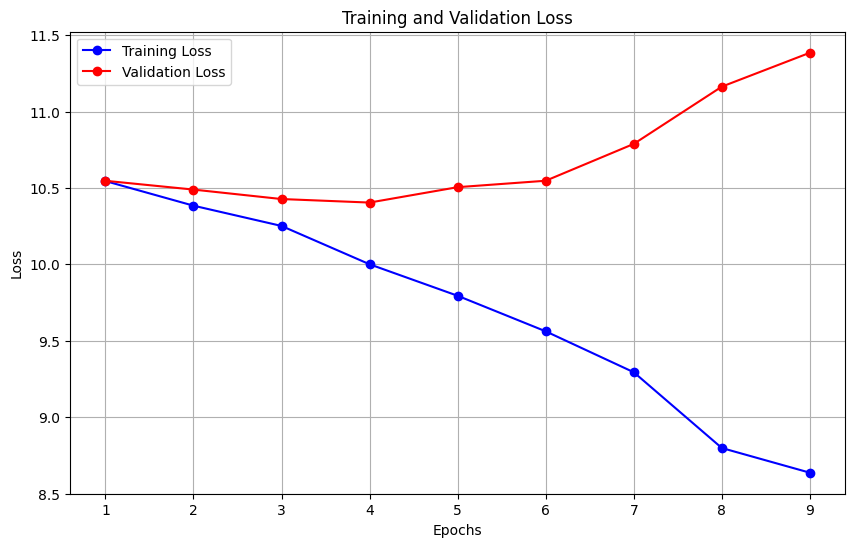

In [15]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

### Saving the model

In [6]:
model_path = "models/qa_context_model_seperated_rnn.pkl"

In [7]:
save_model(model, model_path)

Model saved to models/qa_context_model_seperated_rnn.pkl


In [8]:
model = load_model(model_path=model_path)

Model loaded from models/qa_context_model_seperated_rnn.pkl


### Evaluation Metrics Models

##### 1. Evaluation on Training set

In [9]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question"], prefix_str="Training")

Evaluating:   0%|          | 0/623 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Evaluating: 100%|██████████| 623/623 [00:49<00:00, 12.66it/s]


Training Loss: 9.6719
Training Metrics: {'start_accuracy': 0.05737375765485393, 'start_precision': 0.021453996976900425, 'start_recall': 0.05737375765485393, 'start_f1_score': 0.024288864097167184, 'end_accuracy': 0.04753538801325168, 'end_precision': 0.018921738508495243, 'end_recall': 0.04753538801325168, 'end_f1_score': 0.02183668857283997, 'joint_exact_match': 0.02519827326573637, 'span_overlap_f1': 0.06258896994711094}


(9.671856361254452,
 {'start_accuracy': 0.05737375765485393,
  'start_precision': 0.021453996976900425,
  'start_recall': 0.05737375765485393,
  'start_f1_score': 0.024288864097167184,
  'end_accuracy': 0.04753538801325168,
  'end_precision': 0.018921738508495243,
  'end_recall': 0.04753538801325168,
  'end_f1_score': 0.02183668857283997,
  'joint_exact_match': 0.02519827326573637,
  'span_overlap_f1': 0.06258896994711094})

##### 2. Evaluation on Test Set

In [10]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss(ignore_index=1)
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question"])

Evaluating:   0%|          | 0/63 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Evaluating: 100%|██████████| 63/63 [00:05<00:00, 11.95it/s]


Validation Loss: 10.4043
Validation Metrics: {'start_accuracy': 0.03167420814479638, 'start_precision': 0.010726167423558707, 'start_recall': 0.03167420814479638, 'start_f1_score': 0.012219933956736425, 'end_accuracy': 0.02513826043237808, 'end_precision': 0.014426492025954288, 'end_recall': 0.02513826043237808, 'end_f1_score': 0.013665657213775828, 'joint_exact_match': 0.011563599798893917, 'span_overlap_f1': 0.039642515445080684}


(10.40425533718533,
 {'start_accuracy': 0.03167420814479638,
  'start_precision': 0.010726167423558707,
  'start_recall': 0.03167420814479638,
  'start_f1_score': 0.012219933956736425,
  'end_accuracy': 0.02513826043237808,
  'end_precision': 0.014426492025954288,
  'end_recall': 0.02513826043237808,
  'end_f1_score': 0.013665657213775828,
  'joint_exact_match': 0.011563599798893917,
  'span_overlap_f1': 0.039642515445080684})

### Predictions

##### 1. Predection on Dev Set

In [11]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question"])

Predicting:   0%|          | 0/63 [00:00<?, ?it/s]/home/karimgamaleldin/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(
Predicting: 100%|██████████| 63/63 [00:05<00:00, 10.78it/s]


In [12]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to the mongols to fight against the jin . two han chinese leaders , shi tianze , liu heima ( 劉, liu ni ), and the khitan xiao zhala ( ) defected and commanded the 3 tumens in the mongol army . liu heima and shi tianze served ogödei khan . liu heima and shi tianxiang led armies against western xia for the mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . the three khitan generals shimobeidier ( 石), tabuyir ( 不) and xiaozhacizhizizhongxi ( 之子重喜 ) commanded the three khitan tumens and the four han generals zhang rou , yan shi , shi tianze , and liu heima commanded the four han tumens under ogödei khan .
Predicted Answer: 
True Answer: 3
--------------------------------------------------
Question: what is the atomic number of the element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of the chalc

##### 2. Predicitions on Training Set

In [13]:
train_preds, train_true_labels, train_context, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question"])

Predicting: 100%|██████████| 623/623 [00:51<00:00, 12.02it/s]


In [14]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_context[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: how many national newspapers out of the three are from new york ?
Context: more than 200 newspapers and 350 consumer magazines have an office in the city , and the publishing industry employs about 25 , 000 people . two of the three national daily newspapers in the united states are new york papers : the wall street journal and the new york times , which has won the most pulitzer prizes for journalism . major tabloid newspapers in the city include : the new york daily news , which was founded in 1919 by joseph medill patterson and the new york post , founded in 1801 by alexander hamilton . the city also has a comprehensive ethnic press , with 270 newspapers and magazines published in more than 40 languages . el diario la prensa is new york ' s largest spanish - language daily and the oldest in the nation . the new york amsterdam news , published in harlem , is a prominent african american newspaper . the village voice is the largest alternative newspaper .
Predicted Answer: 
